<a href="https://colab.research.google.com/github/Radhika-0403/Machine-Learning/blob/main/Hierarchical_clustering_of_University_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import calinski_harabasz_score

In [ ]:
df=pd.read_csv("Universities.csv")

In [ ]:
df

In [ ]:
df.shape

(25, 7)

In [ ]:
df.isnull().sum()

Univ        0
SAT         0
Top10       0
Accept      0
SFRatio     0
Expenses    0
GradRate    0
dtype: int64

In [ ]:
features = df[['SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate']]

# Define linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']

# Perform hierarchical clustering for each linkage method
for method in linkage_methods:
    clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage=method)
    df[f'Cluster_{method}'] = clustering.fit_predict(features)

# Display the clustered data for each linkage method
for method in linkage_methods:
    print(f"\nClusters using {method} linkage:")
    print(df[['Univ', f'Cluster_{method}']])


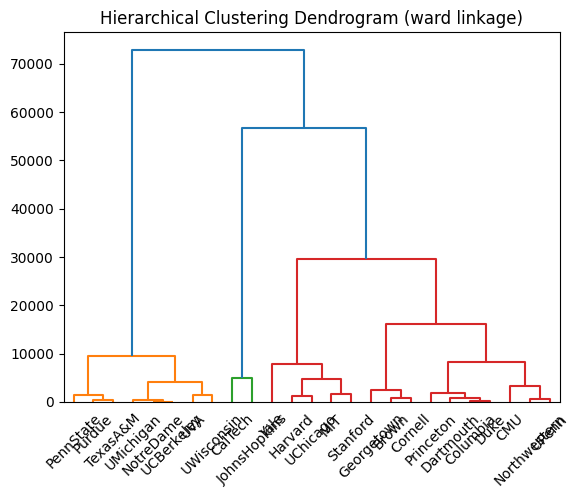

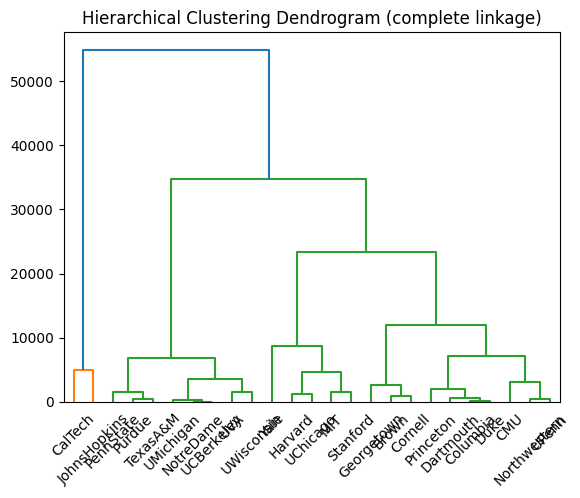

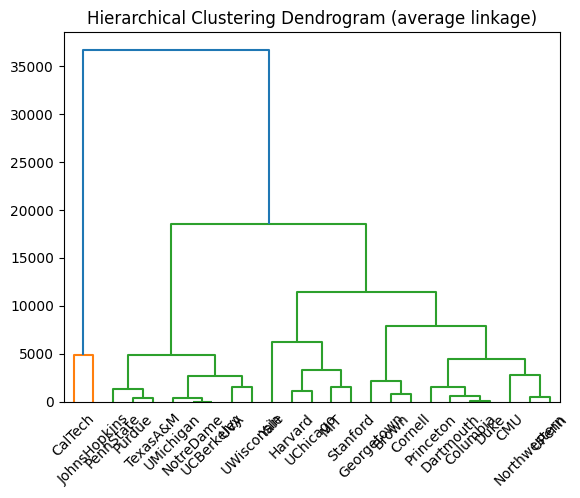

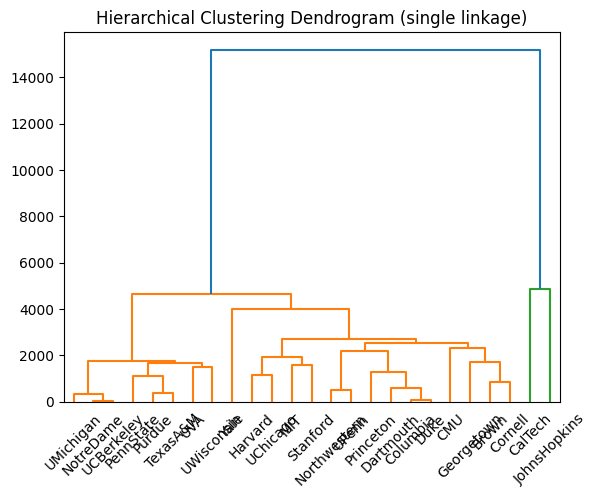

In [ ]:
linkage_methods = ['ward', 'complete', 'average', 'single']

# Plot dendrogram for each linkage method
for method in linkage_methods:
    linkage_matrix = linkage(features, method)
    dendrogram(linkage_matrix, labels=df['Univ'].tolist())
    plt.title(f'Hierarchical Clustering Dendrogram ({method} linkage)')
    plt.show()

When interpreting the Davies-Bouldin Index:

Values closer to 0 indicate better clustering.
Lower values indicate better-defined, more separated clusters.
Higher values suggest less well-defined clusters.

In [ ]:
for method in linkage_methods:
    clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage=method)
    df[f'Cluster_{method}'] = clustering.fit_predict(features)

for method in linkage_methods:
    cluster_labels = df[f'Cluster_{method}'].values
    db_index = davies_bouldin_score(features, cluster_labels)
    print(f"Davies-Bouldin Index ({method} linkage): {db_index}")

Davies-Bouldin Index (ward linkage): 0.36904381741236153
Davies-Bouldin Index (complete linkage): 0.36904381741236153
Davies-Bouldin Index (average linkage): 0.36904381741236153
Davies-Bouldin Index (single linkage): 0.2565789211266342


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


The Davies-Bouldin Index values are very similar across Ward, Complete, and Average linkage methods, suggesting that these methods perform similarly in terms of cluster separation and compactness.

Single linkage has a slightly higher Davies-Bouldin Index, indicating that the clusters formed using Single linkage might have a bit less compactness compared to the other methods.

Based on the Davies-Bouldin Index, Ward, Complete, and Average linkage methods seem to be performing similarly and may be suitable for your dataset.

In [ ]:
for method in linkage_methods:
    clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage=method)
    df[f'Cluster_{method}'] = clustering.fit_predict(features)

for method in linkage_methods:
    cluster_labels = df[f'Cluster_{method}'].values
    ch_index = calinski_harabasz_score(features, cluster_labels)
    print(f"Calinski-Harabasz Index ({method} linkage): {ch_index}")

Calinski-Harabasz Index (ward linkage): 64.78594610537196
Calinski-Harabasz Index (complete linkage): 64.78594610537195
Calinski-Harabasz Index (average linkage): 64.78594610537195
Calinski-Harabasz Index (single linkage): 10.915426629635208


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


The Calinski-Harabasz Index is high and consistent across Ward, Complete, and Average linkage methods, suggesting that these linkage methods have been relatively successful in creating distinct and well-separated clusters.

Single linkage, on the other hand, has a significantly lower index, which may imply that it is not as effective in forming well-defined clusters